In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### <font color='blue'>DataFrame.drop</font> removes rows or columns -> axis: {0 or ‘index’, 1 or ‘columns’}, default 0

In [3]:
X = data.drop('target', axis=1)

In [6]:
y = data['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Checking whether the data is equally splitted

In [9]:
y_test.unique()  # Return unique values of Series object 

array([0, 1], dtype=int64)

In [12]:
Counter(y_train)  # A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values

Counter({1: 131, 0: 111})

### In logistic regression standarization of dataset is required --> From <font color='green'>sklearn.preprocessing.StandardScaler</font> documentation:

#### *For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.*

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit to data, then transform it.
X_test = scaler.transform(X_test)  # Perform standardization by centering and scaling

In [19]:
X_train[0]

array([-1.32773282, -1.43641607,  0.98584243, -0.57412513, -0.63267424,
       -0.41803981,  0.90163913,  0.65626162, -0.70929937, -0.72460883,
       -0.66169316, -0.70710678, -0.46472917])

### We can see that the features are now very close to 0 (that is how standarization works)

## **Applying Logistic Regression**

In [33]:
model = LogisticRegression().fit(X_train, y_train)

In [28]:
prediction = model.predict(X_test)

In [34]:
conf_matrix = confusion_matrix(y_test, prediction)

<AxesSubplot:>

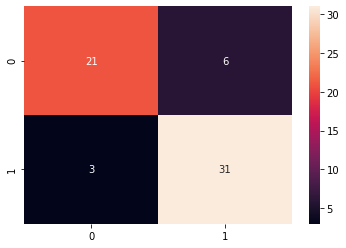

In [38]:
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

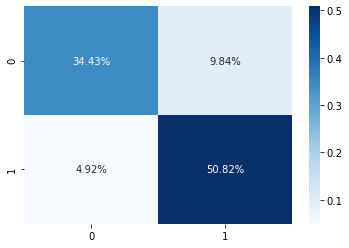

In [41]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')  # Percentage view

In [44]:
acc_score = accuracy_score(y_test, prediction)

In [46]:
print('Accuracy of Logistic Regrssion:', acc_score*100, '\n')
print(classification_report(y_test, prediction))

Accuracy of Logistic Regrssion: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



#### The <font color='orange'>**precision**</font> is the ratio <font color='orange'>**tp / (tp + fp)**</font> where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. <br/> The <font color='green'>**recall**</font> is the ratio <font color='green'>**tp / (tp + fn)**</font> where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. 

![title](pre_rec.png)

![title](f1.png)

Precission to stosunek przewidzianych prawdziwie pozytywnych do wszystkich przewidzianych jako pozytywne.
Recall to stosunek przewidzianych prawdziwie pozytywnych do wszystkich prawdziwie pozytywnych. (pozytywnych, w zbiorze wyników).